<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/prac10Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving PimaIndiansDiabetes.csv to PimaIndiansDiabetes.csv


In [3]:
import io
import pandas as pd
PimaIndiansDiabetes = pd.read_csv(io.StringIO(uploaded['PimaIndiansDiabetes.csv'].decode('utf-8')))

In [62]:
PimaIndiansDiabetes

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [ ]:
# load required modules
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import np_utils 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

In [9]:
dataset = PimaIndiansDiabetes.values

In [63]:
dataset

array([[6, 148, 72, ..., 0.627, 50, 'pos'],
       [1, 85, 66, ..., 0.35100000000000003, 31, 'neg'],
       [8, 183, 64, ..., 0.672, 32, 'pos'],
       ...,
       [5, 121, 72, ..., 0.245, 30, 'neg'],
       [1, 126, 60, ..., 0.349, 47, 'pos'],
       [1, 93, 70, ..., 0.315, 23, 'neg']], dtype=object)

In [22]:
X = dataset[:,0:len(dataset[0])-1].astype(float)
Y = dataset[:,-1]

In [ ]:
encoded_Y

In [23]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y= encoder.transform(Y)

In [24]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y= np_utils.to_categorical(encoded_Y)

In [59]:
# Divide train, test
train_X, test_X, train_y, test_y= train_test_split(X, dummy_y, test_size=0.3, random_state=1234)

In [111]:
  # define model (DNN structure)
  epochs = 100
  batch_size= 10
  model = Sequential()
  model.add(Dense(10, input_dim=len(X[0]), activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.summary()  # show model structure
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_66 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 22        
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_X

In [112]:
# model fitting (learning)
disp= model.fit(train_X, train_y, 
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,        # print fitting process
                validation_data=(test_X, test_y))

Epoch 1/100
54/54 [==============================] - 0s 5ms/step - loss: 1.2030 - accuracy: 0.6611 - val_loss: 0.8572 - val_accuracy: 0.6537
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.7405 - accuracy: 0.6425 - val_loss: 0.7308 - val_accuracy: 0.6277
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6499 - val_loss: 0.7162 - val_accuracy: 0.6320
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6648 - val_loss: 0.7043 - val_accuracy: 0.6234
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6648 - val_loss: 0.6921 - val_accuracy: 0.6364
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6760 - val_loss: 0.6912 - val_accuracy: 0.6190
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6704 - val_loss: 0.6772 - val_accuracy: 0.6277
Epoch 8/100
5

In [113]:
# Test model
pred= model.predict(train_X)
print(pred)
y_classes= [np.argmax(y, axis=None, out=None) for y in pred]
print(y_classes)   # result of prediction
# model performance
score = model.evaluate(train_X, train_y, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

[[7.9189312e-01 2.0810691e-01]
 [7.0571661e-01 2.9428333e-01]
 [9.9999046e-01 9.5931564e-06]
 ...
 [6.4077318e-01 3.5922676e-01]
 [9.8085666e-01 1.9143376e-02]
 [8.1612629e-01 1.8387374e-01]]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

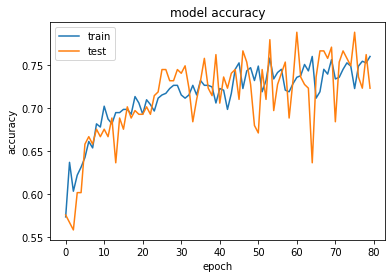

In [110]:
# summarize history for accuracy
plt.plot(disp.history['accuracy'])
plt.plot(disp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

----------------------------------------------------------------------------------------

In [44]:
# load required modules
from keras.datasets import mnist
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten 
from keras.layers import Dropout 
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

In [45]:
# load dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X= train_X/ 255.0, test_X/ 255.0
# one hot encoding
train_y= np_utils.to_categorical(train_y)
test_y= np_utils.to_categorical(test_y)

11493376/11490434 [==============================] - 0s 0us/step


In [46]:
# define model (DNN structure)
epochs = 20
batch_size= 128
learning_rate= 0.01
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()  # show model structure 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
________________________________________________

In [54]:
# Compile model
adam = optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam',
              metrics='accuracy')
# model fitting (learning)
disp= model.fit(train_X, train_y, 
                batch_size=batch_size,
                epochs=epochs,verbose=1,        # print fitting process  
                validation_split= 0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5611 - accuracy: 0.8270 - val_loss: 0.1992 - val_accuracy: 0.9415
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2346 - accuracy: 0.9306 - val_loss: 0.1376 - val_accuracy: 0.9612
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1820 - accuracy: 0.9435 - val_loss: 0.1171 - val_accuracy: 0.9655
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1519 - accuracy: 0.9545 - val_loss: 0.1064 - val_accuracy: 0.9696
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1335 - accuracy: 0.9599 - val_loss: 0.0990 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1230 - accuracy: 0.9616 - val_loss: 0.0939 - val_accuracy: 0.9731
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9642 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 

[[3.7817123e-09 1.3948117e-07 1.0787227e-05 ... 9.9997556e-01
  1.8263647e-08 3.9091685e-07]
 [1.0983022e-10 1.5210068e-05 9.9998438e-01 ... 1.9793643e-10
  5.1723518e-11 1.2804587e-12]
 [2.0020630e-08 9.9999130e-01 4.5367111e-07 ... 6.4119504e-06
  1.2602121e-06 1.5978806e-08]
 ...
 [1.2405026e-10 1.0989578e-09 4.8378683e-07 ... 2.3243118e-07
  3.0251734e-08 3.0593435e-07]
 [5.6571577e-15 7.5590012e-12 1.5127599e-13 ... 1.3774598e-13
  3.7557899e-09 4.2236253e-13]
 [7.4480717e-12 2.6053068e-14 4.5694816e-11 ... 1.8777772e-15
  4.0320226e-11 5.8664098e-12]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 

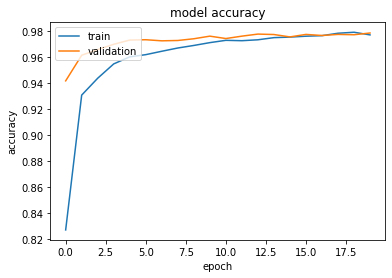

In [55]:
# Test model
pred= model.predict(test_X)
print(pred)
y_classes= [np.argmax(y, axis=None, out=None) for y in pred]
print(y_classes)   # result of prediction
# model performance
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# summarize history for accuracy
plt.plot(disp.history['accuracy'])
plt.plot(disp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()